In [1]:
# Import PyTorch
import torch

list_a = [1, 2, 3, 4]

# Create a tensor from list_a
tensor_a = torch.tensor(list_a)

# Display the tensor device
print(tensor_a.device)

# Display the tensor data type
print(tensor_a.dtype)

cpu
torch.int64


In [2]:
import numpy as np

array_a = np.array([[1, 1, 1],
                   [2, 3, 4],
                   [4, 5, 6]])

array_b = np.array([[7, 5, 4],
                   [2, 2, 8],
                   [6, 3, 8]])

In [3]:
# Create two tensors from the arrays
tensor_a = torch.from_numpy(array_a)
tensor_b = torch.from_numpy(array_b)

# Subtract tensor_b from tensor_a 
tensor_c = tensor_a - tensor_b

# Multiply each element of tensor_a with each element of tensor_b
tensor_d = tensor_a * tensor_b

# Add tensor_c with tensor_d
tensor_e = tensor_c + tensor_d
print(tensor_e)

tensor([[ 1,  1,  1],
        [ 4,  7, 28],
        [22, 17, 46]], dtype=torch.int32)


In [4]:
import torch
import torch.nn as nn

input_tensor = torch.Tensor([[2, 3, 6, 7, 9, 3, 2, 1]])

# Implement a small neural network with exactly two linear layers
model = nn.Sequential(nn.Linear(8,1),
                      nn.Linear(1,1)
                     )

output = model(input_tensor)
print(output)

tensor([[0.8095]], grad_fn=<AddmmBackward0>)


In [5]:
input_tensor = torch.tensor([[-0.3]])

# Create a sigmoid function and apply it on input_tensor
sigmoid = nn.Sigmoid()
probability = sigmoid(input_tensor)
print(probability)

tensor([[0.4256]])


In [6]:
input_tensor = torch.tensor([[1.0, -6.0, 2.5, -0.3, 1.2, 0.8]])

# Create a softmax function and apply it on input_tensor
softmax = nn.Softmax(dim=-1)
probabilities = softmax(input_tensor)
print(probabilities)

tensor([[1.2828e-01, 1.1698e-04, 5.7492e-01, 3.4961e-02, 1.5669e-01, 1.0503e-01]])


In [7]:
import torch
import torch.nn as nn

input_tensor = torch.Tensor([[3, 4, 6, 2, 3, 6, 8, 9]])

# Implement a small neural network for binary classification
model = nn.Sequential(
  nn.Linear(8,1),
  nn.Sigmoid()
)

output = model(input_tensor)
print(output)

tensor([[0.8540]], grad_fn=<SigmoidBackward0>)


In [8]:
import torch
import torch.nn as nn

input_tensor = torch.Tensor([[3, 4, 6, 7, 10, 12, 2, 3, 6, 8, 9]])

# Update network below to perform a multi-class classification with four labels
model = nn.Sequential(
  nn.Linear(11, 20),
  nn.Linear(20, 12),
  nn.Linear(12, 6),
  nn.Linear(6, 4), 
  nn.Softmax(dim = -1) #dim = number of columns of the last layer (4) = number of classes probabilies to output
)

output = model(input_tensor)
print(output)

tensor([[0.6538, 0.0241, 0.0331, 0.2891]], grad_fn=<SoftmaxBackward0>)


In [9]:
import torch.nn.functional as F

y = 1
num_classes = 3

# Create the one-hot encoded vector using NumPy
one_hot_numpy = np.array([0,1,0])

# Create the one-hot encoded vector using PyTorch
one_hot_pytorch = F.one_hot(torch.tensor(y),num_classes)
one_hot_pytorch

tensor([0, 1, 0])

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F

y = [2]
scores = torch.tensor([[0.1, 6.0, -2.0, 3.2]])

# Create a one-hot encoded vector of the label y
one_hot_label = F.one_hot(torch.tensor(y), scores.shape[1])

# Create the cross entropy loss function
criterion = nn.CrossEntropyLoss()

# Calculate the cross entropy loss
loss = criterion(scores.double(), one_hot_label.double())
print(scores, scores.double())
print(one_hot_label, one_hot_label.double())
print(loss)

tensor([[ 0.1000,  6.0000, -2.0000,  3.2000]]) tensor([[ 0.1000,  6.0000, -2.0000,  3.2000]], dtype=torch.float64)
tensor([[0, 0, 1, 0]]) tensor([[0., 0., 1., 0.]], dtype=torch.float64)
tensor(8.0619, dtype=torch.float64)


In [11]:
# by setting requires_grad=True, you’re telling PyTorch to keep track of the gradient information for this tensor in the computational graph. This is essential for optimization tasks where gradients are needed for parameter updates.

weight = torch.tensor([[-0.2866,  0.4008, -0.9533, -0.0564,  0.8450,  0.3200, -0.1661, -0.0171, -0.1324],
                       [-1.2251,  0.6066, -1.5971, -1.1549, -0.7852,  0.9700,  0.5051,  0.5751, -0.0667]], requires_grad=True)

bias = torch.tensor([-0.3122,  0.4547], requires_grad=True)

preds = torch.tensor([[-0.3612, -1.0112]], requires_grad=True)

target = torch.tensor([[1., 0.]], requires_grad=True)

In [12]:
criterion = nn.CrossEntropyLoss()

# Calculate the loss
loss = criterion(preds, target)

# Compute the gradients of the loss
loss.backward(retain_graph=True)

# Display gradients of the weight and bias tensors in order
print(weight.grad)
print(bias.grad)

# In your case, weight and bias are not used at all in the computation of preds and target, so their gradients are not computed.

None
None


In [13]:
# In a typical setup, you would have an input tensor x, and you would compute preds as a function of x, weight, and bias. Then, you would compute the loss as a function of preds and target. When you call loss.backward(), PyTorch would then compute the gradients for all tensors that have requires_grad=True and are involved in the computation of loss.

# Assume x is your input data
x = torch.randn((1, 9), requires_grad=True)

# Compute preds using weight, bias, and x
preds = torch.mm(x, weight.t()) + bias
print(preds)

# Calculate the loss
loss = criterion(preds, target)

# Compute the gradients of the loss
loss.backward(retain_graph=True)

# Display gradients of the weight and bias tensors in order
print(weight.grad)
print(bias.grad)

loss

tensor([[-1.1971,  0.1983]], grad_fn=<AddBackward0>)
tensor([[-0.8914, -0.5656, -0.2458,  1.2118,  0.3049,  0.5331, -0.2164,  0.4623,
         -0.4388],
        [ 0.8914,  0.5656,  0.2458, -1.2118, -0.3049, -0.5331,  0.2164, -0.4623,
          0.4388]])
tensor([-0.8014,  0.8014])


tensor(1.6167, grad_fn=<DivBackward1>)

In [14]:
model = nn.Sequential(nn.Linear(16, 8),
                      nn.Sigmoid(),
                      nn.Linear(8, 2))

# Access the weight of the first linear layer
weight_0 = model[0].weight

# Access the bias of the second linear layer
bias_1 = model[2].bias

weight_0, bias_1

(Parameter containing:
 tensor([[ 0.0073, -0.0384, -0.0511,  0.0602, -0.0353,  0.1290, -0.1991, -0.0714,
          -0.1095,  0.1479, -0.0208, -0.1993, -0.1749, -0.0920,  0.2437,  0.1761],
         [ 0.1979, -0.1064, -0.0467,  0.0945,  0.2426, -0.0357, -0.2103, -0.0995,
           0.0263, -0.0337, -0.0393, -0.1632,  0.1992,  0.1114,  0.0418, -0.2088],
         [-0.2094, -0.1228,  0.2176,  0.0137,  0.0591, -0.1304,  0.0013,  0.1968,
          -0.1962,  0.0874, -0.2273, -0.1566,  0.1325, -0.1671, -0.1682, -0.0556],
         [ 0.1930,  0.1697, -0.1509,  0.1054, -0.0963,  0.1747, -0.2045, -0.1913,
           0.0612,  0.0379, -0.0314,  0.2488, -0.1538,  0.0589, -0.0182,  0.1241],
         [ 0.1222,  0.0852,  0.1078, -0.0527, -0.0737, -0.1650, -0.0926, -0.0676,
           0.2171,  0.0743,  0.1272, -0.1141,  0.0392, -0.0659, -0.0134, -0.0951],
         [ 0.2061,  0.1828,  0.0783, -0.1408,  0.0840,  0.1594, -0.1797,  0.0102,
           0.0976, -0.2448, -0.1773,  0.1721, -0.1461, -0.1642, -0.158

In [15]:
model = nn.Sequential(
  nn.Linear(in_features=16, out_features=8, bias=True),
  nn.Linear(in_features=8, out_features=4, bias=True),
  nn.Linear(in_features=4, out_features=2, bias=True)
)

lr = 0.001

In [16]:
# Assume we have some input data x, and corresponding target data y
x = torch.randn(1, 16)  # Input data (batch size = 1, number of features = 16)
y = torch.tensor([1])   # Target data (batch size = 1, number of classes = 2)

x,y

(tensor([[ 1.0892,  0.1766, -0.2482,  0.3880, -1.1886, -0.5971,  0.2545, -0.4066,
           0.0260, -0.1568, -0.1238, -0.5466, -0.0319, -0.6419,  1.1982, -0.6694]]),
 tensor([1]))

In [17]:
# Forward pass through the model
output = model(x)
output


tensor([[ 0.3291, -0.4872]], grad_fn=<AddmmBackward0>)

In [18]:
# Define the loss function
loss_function = nn.CrossEntropyLoss()

# Calculate the loss
loss = loss_function(output, y)
loss


tensor(1.1824, grad_fn=<NllLossBackward0>)

In [19]:
# Define the learning rate
lr = 0.001

# Now perform a backward pass and update the weights
loss.backward()

In [20]:
weight0 = model[0].weight
weight1 = model[1].weight
weight2 = model[2].weight

weight0,weight1,weight2

(Parameter containing:
 tensor([[-0.0717,  0.0509,  0.1893,  0.0219,  0.1592, -0.0188,  0.1918, -0.0388,
          -0.1228, -0.2339,  0.0765, -0.0466,  0.1464, -0.1004,  0.2349,  0.0677],
         [-0.2203,  0.0946,  0.1998,  0.0670,  0.1415, -0.0226,  0.0226, -0.0152,
           0.1181,  0.1954, -0.2238, -0.1691, -0.2268,  0.1799, -0.1769, -0.1506],
         [ 0.0441,  0.0798, -0.0110, -0.0103,  0.2231, -0.1987,  0.0642, -0.1450,
           0.0424,  0.1472, -0.1651, -0.2152,  0.1633,  0.0149, -0.0009,  0.0086],
         [ 0.1946, -0.0694,  0.0122,  0.0291, -0.1922,  0.2183,  0.0971, -0.1296,
           0.0938, -0.1794,  0.0706, -0.2117, -0.0613, -0.0439, -0.0315,  0.0840],
         [ 0.1510,  0.0443,  0.2113,  0.0456,  0.1811, -0.1664, -0.0184,  0.0016,
          -0.2347,  0.1963, -0.0475, -0.1693,  0.0024, -0.0416,  0.0044, -0.0823],
         [-0.0256, -0.0919, -0.2093,  0.0553,  0.1324,  0.0579, -0.0021,  0.1649,
           0.0502, -0.1208,  0.0905, -0.1830,  0.0986, -0.1749, -0.168

In [21]:
# Access the gradients of the weight of each linear layer
grads0 = weight0.grad
grads1 = weight1.grad
grads2 = weight2.grad

grads0,grads1,grads2

(tensor([[-4.1964e-02, -6.8032e-03,  9.5632e-03, -1.4948e-02,  4.5794e-02,
           2.3005e-02, -9.8039e-03,  1.5665e-02, -1.0026e-03,  6.0408e-03,
           4.7715e-03,  2.1059e-02,  1.2279e-03,  2.4732e-02, -4.6165e-02,
           2.5792e-02],
         [ 7.3225e-03,  1.1871e-03, -1.6687e-03,  2.6084e-03, -7.9907e-03,
          -4.0143e-03,  1.7107e-03, -2.7335e-03,  1.7495e-04, -1.0541e-03,
          -8.3259e-04, -3.6746e-03, -2.1426e-04, -4.3157e-03,  8.0555e-03,
          -4.5005e-03],
         [ 3.4078e-01,  5.5247e-02, -7.7661e-02,  1.2139e-01, -3.7188e-01,
          -1.8682e-01,  7.9615e-02, -1.2722e-01,  8.1419e-03, -4.9056e-02,
          -3.8748e-02, -1.7101e-01, -9.9716e-03, -2.0085e-01,  3.7489e-01,
          -2.0945e-01],
         [-1.0164e-01, -1.6477e-02,  2.3162e-02, -3.6204e-02,  1.1091e-01,
           5.5717e-02, -2.3744e-02,  3.7941e-02, -2.4282e-03,  1.4630e-02,
           1.1556e-02,  5.1003e-02,  2.9740e-03,  5.9901e-02, -1.1181e-01,
           6.2465e-02],
    

In [22]:
# Update the weights using the learning rate and the gradients
weight0 = weight0 - lr*grads0
weight1 = weight1 - lr*grads1
weight2 = weight2 - lr*grads2

weight0,weight1,weight2

(tensor([[-0.0716,  0.0509,  0.1892,  0.0219,  0.1592, -0.0188,  0.1918, -0.0389,
          -0.1228, -0.2339,  0.0765, -0.0467,  0.1464, -0.1004,  0.2349,  0.0677],
         [-0.2203,  0.0946,  0.1998,  0.0670,  0.1415, -0.0226,  0.0226, -0.0152,
           0.1181,  0.1954, -0.2238, -0.1691, -0.2268,  0.1799, -0.1769, -0.1506],
         [ 0.0437,  0.0797, -0.0110, -0.0104,  0.2235, -0.1985,  0.0641, -0.1449,
           0.0424,  0.1473, -0.1651, -0.2151,  0.1634,  0.0151, -0.0013,  0.0088],
         [ 0.1947, -0.0694,  0.0122,  0.0292, -0.1924,  0.2182,  0.0972, -0.1297,
           0.0938, -0.1794,  0.0706, -0.2117, -0.0613, -0.0439, -0.0314,  0.0839],
         [ 0.1511,  0.0443,  0.2113,  0.0456,  0.1810, -0.1665, -0.0184,  0.0016,
          -0.2347,  0.1962, -0.0475, -0.1693,  0.0024, -0.0417,  0.0045, -0.0824],
         [-0.0253, -0.0919, -0.2094,  0.0555,  0.1320,  0.0577, -0.0021,  0.1648,
           0.0502, -0.1208,  0.0904, -0.1831,  0.0985, -0.1751, -0.1681,  0.0815],
         [

In [23]:

# Update the weights
with torch.no_grad():
    for param in model.parameters():
        param -= lr * param.grad
        if len(param.shape) == 1:
            print('BIAS')
        else:
            print('WEIGHT')
        print(param)
        print('--------------------')



WEIGHT
Parameter containing:
tensor([[-0.0716,  0.0509,  0.1892,  0.0219,  0.1592, -0.0188,  0.1918, -0.0389,
         -0.1228, -0.2339,  0.0765, -0.0467,  0.1464, -0.1004,  0.2349,  0.0677],
        [-0.2203,  0.0946,  0.1998,  0.0670,  0.1415, -0.0226,  0.0226, -0.0152,
          0.1181,  0.1954, -0.2238, -0.1691, -0.2268,  0.1799, -0.1769, -0.1506],
        [ 0.0437,  0.0797, -0.0110, -0.0104,  0.2235, -0.1985,  0.0641, -0.1449,
          0.0424,  0.1473, -0.1651, -0.2151,  0.1634,  0.0151, -0.0013,  0.0088],
        [ 0.1947, -0.0694,  0.0122,  0.0292, -0.1924,  0.2182,  0.0972, -0.1297,
          0.0938, -0.1794,  0.0706, -0.2117, -0.0613, -0.0439, -0.0314,  0.0839],
        [ 0.1511,  0.0443,  0.2113,  0.0456,  0.1810, -0.1665, -0.0184,  0.0016,
         -0.2347,  0.1962, -0.0475, -0.1693,  0.0024, -0.0417,  0.0045, -0.0824],
        [-0.0253, -0.0919, -0.2094,  0.0555,  0.1320,  0.0577, -0.0021,  0.1648,
          0.0502, -0.1208,  0.0904, -0.1831,  0.0985, -0.1751, -0.1681,  0.

In [24]:
# The model.zero_grad() line is used to reset the gradients of all the model parameters to zero.

# In PyTorch, when you call .backward() on the loss tensor, it computes the derivative of the loss with respect to all the parameters in the loss function that have requires_grad=True. These gradients are accumulated into the .grad attribute of each parameter.

# This means that for each mini-batch of inputs in your dataset, the gradients are accumulated (i.e., summed up) across all mini-batches. Therefore, you would want to zero out the gradients at the start of a new mini-batch, so that you can start fresh for each mini-batch.

# If you don’t zero the gradients at each mini batch, the gradient would point in some other direction than the intended direction towards the minimum (or maximum, in case of maximization objectives). This is because PyTorch accumulates the gradients on subsequent backward passes, which is convenient while training RNNs. Hence, the default action is to accumulate (i.e., sum) the gradients on every loss.backward() call.

model.zero_grad()

In [25]:
import torch.optim as optim

# Create the optimizer
optimizer = optim.SGD(model.parameters(), lr=0.001)
optimizer


SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [26]:
criterion = nn.CrossEntropyLoss()

pred = torch.tensor([[-0.0988,  0.5181]] , requires_grad=True)

target = torch.tensor([[1., 0.]], requires_grad=True)

loss = criterion(pred, target)

loss

tensor(1.0484, grad_fn=<DivBackward1>)

In [27]:
loss.backward()

In [28]:
# Update the model's parameters using the optimizer
optimizer.step()
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [29]:
y_hat = np.array(10)
y = np.array(1)

# Calculate the MSELoss using NumPy
mse_numpy = np.mean((y_hat - y)**2)

# Create the MSELoss function
criterion = nn.MSELoss()

# Calculate the MSELoss using the created loss function
mse_pytorch = criterion(torch.tensor(y_hat).float(), torch.tensor(y).float())
print(mse_numpy, mse_pytorch)

81.0 tensor(81.)


In [30]:
features = np.array([[1. , 0. , 0. , 2. ],
                   [2. , 0. , 0. , 0. ],
                   [2. , 0. , 0.5, 1. ],
                   [2. , 0. , 0. , 1. ],
                   [2. , 0. , 1. , 1. ],
                   [1. , 0. , 1. , 2. ]])

target = torch.tensor([[0.1562],
                       [0.3750],
                       [0.3422],
                       [0.1234],  # Example value
                       [0.5678],  # Example value
                       [0.9101]])  # Example value

In [31]:
num_epochs = 10

from torch.utils.data import TensorDataset

dataset = TensorDataset(torch.tensor(features).float(), torch.tensor(target).float())
dataset


C:\Users\Alienware\AppData\Local\Temp\ipykernel_40668\3058105529.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dataset = TensorDataset(torch.tensor(features).float(), torch.tensor(target).float())


In [32]:
from torch.utils.data import DataLoader

dataloader = DataLoader(dataset, batch_size=4, shuffle=True)
dataloader

In [34]:
data = [torch.tensor([[2., 0., 1., 1.],
         [2., 0., 1., 2.],
         [2., 0., 0., 1.]]),
 torch.tensor([[0.1562],
         [0.3750],
         [0.3422]])]

In [35]:
model = nn.Sequential(
  nn.Linear(in_features=4, out_features=2, bias=True),
  nn.Sigmoid(),
  nn.Linear(in_features=2, out_features=1, bias=True)
)

In [36]:
# Loop over the number of epochs and the dataloader
for i in range(num_epochs):
    for data in dataloader:
        # Set the gradients to zero
        optimizer.zero_grad()
        # Run a forward pass
        feature, target = data
        prediction = model(feature)    
        # Calculate the loss
        loss = criterion(prediction, target)    
        # Compute the gradients
        loss.backward()
        # Update the model's parameters
        optimizer.step()


In [37]:
def show_results(model, dataloader):
    model.eval() #  before you run inference on a model trained with dropout and/or batch normalization, you should call model.eval() to set these layers to evaluation mode. If you want to switch back to training mode later, you can use model.train().
    for feature, target in dataloader:
        preds = model(feature)
        for p, t in zip(preds, target):
            print(f'Ground truth salary: {t.item():.3f}. Predicted salary: {p.item():.3f}.')
            
show_results(model, dataloader)

Ground truth salary: 0.123. Predicted salary: 0.164.
Ground truth salary: 0.910. Predicted salary: 0.131.
Ground truth salary: 0.342. Predicted salary: 0.154.
Ground truth salary: 0.375. Predicted salary: 0.150.
Ground truth salary: 0.156. Predicted salary: 0.151.
Ground truth salary: 0.568. Predicted salary: 0.144.


In [38]:
# Notice that the input value was -1, and the ReLU function returned zero. Recall from the graph in the video that for negative values of x, the output of ReLU is always zero, and indeed the gradient is zero everywhere because there is no change in the function with respect to any negative value of x.

# Create a ReLU function with PyTorch
relu_pytorch = nn.ReLU()

# Apply your ReLU function on x, and calculate gradients
x = torch.tensor(-1.0, requires_grad=True)
y = relu_pytorch(x)
y.backward()

# Print the gradient of the ReLU function for x
gradient = x.grad
print(x) 
print(gradient)

tensor(-1., requires_grad=True)
tensor(0.)


In [39]:
# Create a leaky relu function in PyTorch
leaky_relu_pytorch = nn.LeakyReLU(negative_slope=0.05)

x = torch.tensor(-2.0)
# Call the above function on the tensor x
output = leaky_relu_pytorch(x)
print(x) 
print(output)

tensor(-2.)
tensor(-0.1000)


In [40]:
model = nn.Sequential(nn.Linear(16, 4),
                      nn.Linear(4, 2),
                      nn.Linear(2, 1))

total = 0

# Calculate the number of parameters in the model
for par in model.parameters():
    print(par)
    print(par.numel())
    total += par.numel()
    
total

Parameter containing:
tensor([[ 0.1862,  0.0980, -0.1222,  0.1005,  0.1069, -0.2354, -0.1772, -0.1721,
         -0.0939, -0.0653,  0.1532,  0.1419,  0.1502,  0.0098, -0.1772, -0.1423],
        [ 0.1687, -0.1717, -0.2025, -0.0505, -0.0299,  0.0332, -0.2159, -0.1751,
         -0.1178,  0.0551, -0.0579, -0.0094,  0.0810, -0.1966, -0.0330, -0.0307],
        [-0.0525, -0.1033,  0.1734,  0.1692, -0.0948,  0.2383,  0.0143,  0.1720,
          0.2289,  0.2408,  0.1240, -0.2185, -0.0529,  0.1023,  0.2017,  0.1537],
        [-0.0897,  0.1599,  0.2161,  0.1353,  0.1505, -0.0355, -0.1075,  0.2073,
         -0.2126,  0.1721, -0.1590, -0.1908,  0.1370,  0.0106,  0.2269,  0.1264]],
       requires_grad=True)
64
Parameter containing:
tensor([-0.1000,  0.1100,  0.2212,  0.0705], requires_grad=True)
4
Parameter containing:
tensor([[ 0.3728,  0.3595,  0.0345,  0.1524],
        [-0.1663,  0.0389, -0.1561, -0.4902]], requires_grad=True)
8
Parameter containing:
tensor([-0.0411,  0.3119], requires_grad=True)


81

In [41]:
def calculate_capacity(model):
    total = 0
    for p in model.parameters():
        total += p.numel()
    return total

In [42]:
n_features = 8
n_classes = 2

input_tensor = torch.Tensor([[3, 4, 6, 2, 3, 6, 8, 9]])

# Create a neural network with less than 120 parameters
model = nn.Sequential(nn.Linear(n_features, 8),
                      nn.Linear(8, 4),
                      nn.Linear(4, n_classes))
output = model(input_tensor)

print(calculate_capacity(model))

118


In [43]:
n_features = 8
n_classes = 2

input_tensor = torch.Tensor([[3, 4, 6, 2, 3, 6, 8, 9]])

# Create a neural network with more than 120 parameters
model = nn.Sequential(nn.Linear(n_features, 16),
                      nn.Linear(16, 8),
                      nn.Linear(8, 4),
                      nn.Linear(4, n_classes))

output = model(input_tensor)

print(calculate_capacity(model))

326


In [44]:
def function(x):
    return x**4 + x**3 - 5*x**2 

In [45]:
x = torch.tensor(2.0, requires_grad=True)
y = function(x)

x, y


(tensor(2., requires_grad=True), tensor(4., grad_fn=<SubBackward0>))

In [46]:
# This code defines a function optimize_and_plot that optimizes a function using gradient descent and plots the steps of the optimizer. The learning rate lr and momentum are parameters of the function. The function uses PyTorch for the optimization and matplotlib for the plotting. The function being optimized is defined elsewhere in the code. The plot shows the steps of the optimizer in red and the function being optimized in blue. Each step of the optimizer is labeled with its step number. The plot is displayed using plt.show().

import matplotlib.pyplot as plt

def optimize_and_plot(lr=0.01, momentum=0.0):
    # Initialize the variable x and the buffer for momentum
    x = torch.tensor(2.0, requires_grad=True)
    buffer = torch.zeros_like(x.data)
    values = []

    # Perform optimization for 10 steps (run 10 steps of the SGD optimizer)
    for i in range(10):
        # Compute the function value at current x
        y = function(x)
        # Store the current x and y values
        values.append((x.clone(), y.clone()))
        # Compute the gradient of y with respect to x
        y.backward()

        # Update x using gradient descent with optional momentum
        d_p = x.grad.data
        if momentum != 0:
            # Apply momentum to the gradient
            buffer.mul_(momentum).add_(d_p)
            d_p = buffer

        # Update x using the computed gradient
        x.data.add_(d_p, alpha=-lr)
        # Reset the gradient of x to zero
        x.grad.zero_()

    # Generate a range of x values for plotting the function
    x = np.arange(-3, 2, 0.001)
    y = function(x)

    # Plot the function and the steps taken by the optimizer
    plt.figure(figsize=(10, 5))
    plt.plot([v[0].detach().numpy() for v in values], [v[1].detach().numpy() for v in values], 'r-X', linewidth=2, markersize=7)
    for i in range(10):
        # Annotate the optimizer steps on the plot
        plt.text(values[i][0]+0.1, values[i][1], f'step {i}', fontdict={'color': 'r'})
    # Plot the function
    plt.plot(x, y, linewidth=2)
    plt.grid()
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.legend(['Optimizer steps', 'Square function'])
    plt.show()



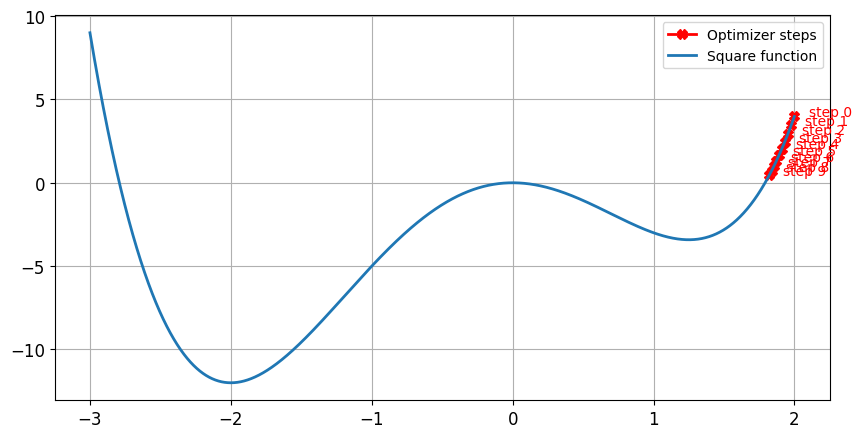

In [47]:
# Try a first learning rate value
lr0 = 0.001
optimize_and_plot(lr=lr0)

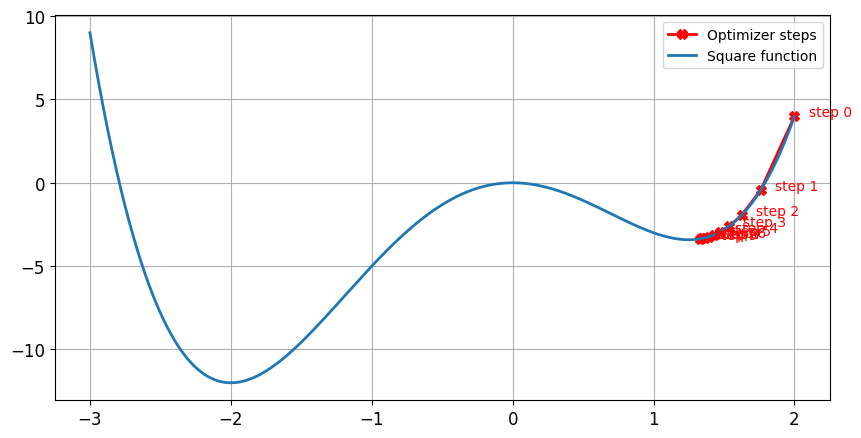

In [48]:
# Try a second learning rate value
lr1 = 0.01
optimize_and_plot(lr=lr1)

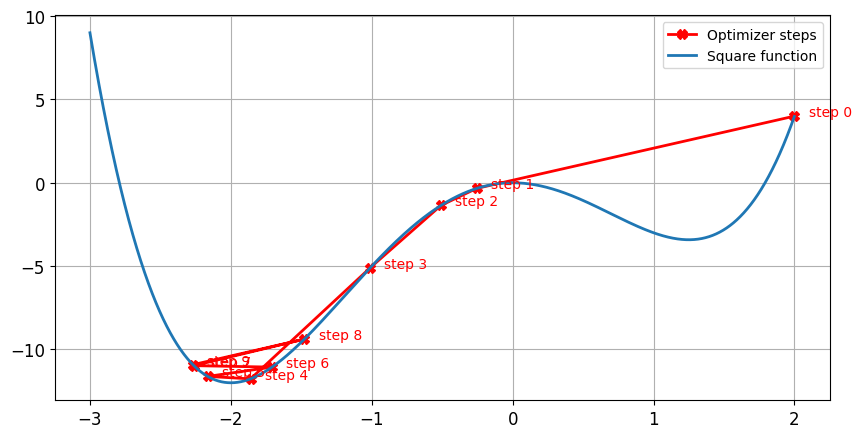

In [49]:
# Try a better learning rate value
lr2 = 0.094
optimize_and_plot(lr=lr2)

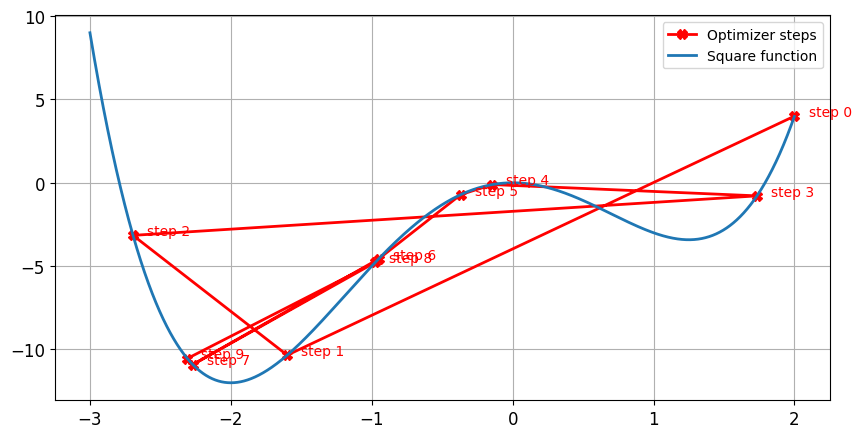

In [50]:
# Try a too high learning rate value
lr2 = 0.15
optimize_and_plot(lr=lr2)

In [51]:
# same function, with 20 steps

def optimize_and_plot(lr=0.01, momentum=0.0):
    # Initialize the variable x and the buffer for momentum
    x = torch.tensor(2.0, requires_grad=True)
    buffer = torch.zeros_like(x.data)
    values = []

    # Perform optimization for 20 steps (run 20 steps of the SGD optimizer)
    for i in range(20):
        # Compute the function value at current x
        y = function(x)
        # Store the current x and y values
        values.append((x.clone(), y.clone()))
        # Compute the gradient of y with respect to x
        y.backward()

        # Update x using gradient descent with optional momentum
        d_p = x.grad.data
        if momentum != 0:
            # Apply momentum to the gradient
            buffer.mul_(momentum).add_(d_p)
            d_p = buffer

        # Update x using the computed gradient
        x.data.add_(d_p, alpha=-lr)
        # Reset the gradient of x to zero
        x.grad.zero_()

    # Generate a range of x values for plotting the function
    x = np.arange(-3, 2, 0.001)
    y = function(x)

    # Plot the function and the steps taken by the optimizer
    plt.figure(figsize=(10, 5))
    plt.plot([v[0].detach().numpy() for v in values], [v[1].detach().numpy() for v in values], 'r-X', linewidth=2, markersize=7)
    for i in range(10):
        # Annotate the optimizer steps on the plot
        plt.text(values[i][0]+0.1, values[i][1], f'step {i}', fontdict={'color': 'r'})
    # Plot the function
    plt.plot(x, y, linewidth=2)
    plt.grid()
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.legend(['Optimizer steps', 'Square function'])
    plt.show()

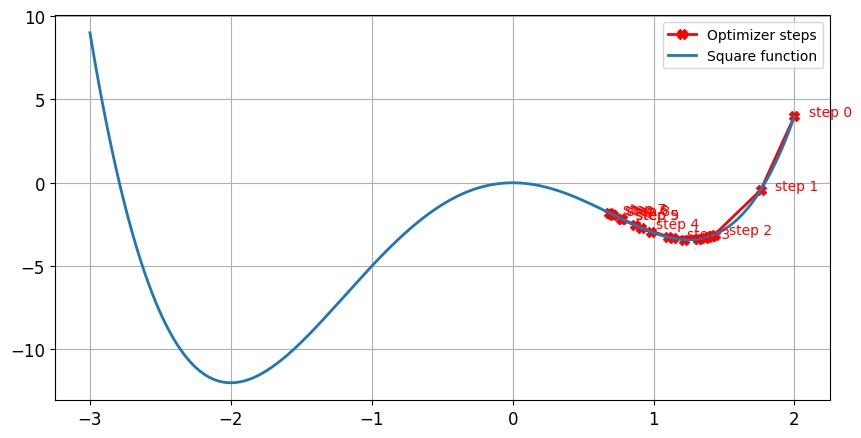

In [52]:
# Try a first value for momentum,to get stuck in the first minimum

mom0 = 0.8
optimize_and_plot(momentum=mom0)

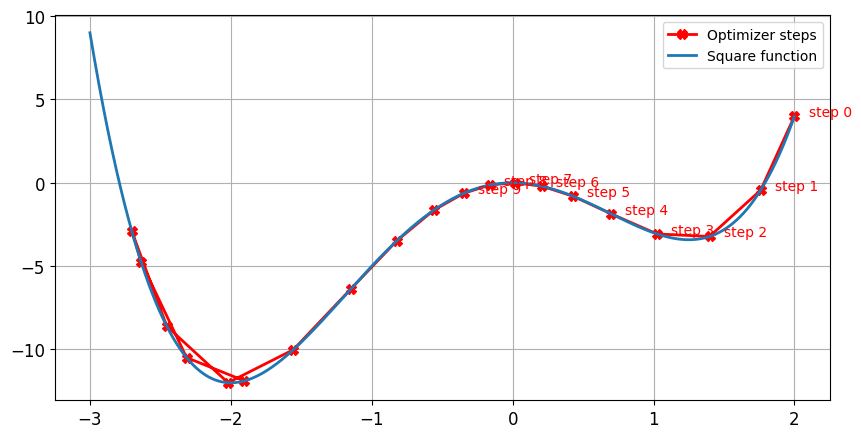

In [53]:
# Try a second value for momentum to reach the global minimum

mom1 = 0.95
optimize_and_plot(momentum=mom1)

In [54]:
model = nn.Sequential(
  nn.Linear(in_features=8, out_features=16, bias=True),
  nn.Linear(in_features=16, out_features=32, bias=True),
  nn.Linear(in_features=32, out_features=10, bias=True)
)

In [55]:
for name, param in model.named_parameters(): 
    print (name)

0.weight
0.bias
1.weight
1.bias
2.weight
2.bias


In [56]:
for name, param in model.named_parameters():    
  
    # Check if the parameters belong to the first layer
    if name == '0.weight' or name == '0.bias':
      
        # Freeze the parameters
        param.requires_grad = False
  
    # Check if the parameters belong to the second layer
    if name == '1.weight' or name == '1.bias':
      
        # Freeze the parameters
        param.requires_grad = False

In [57]:
layer0 = nn.Linear(16, 32)
layer1 = nn.Linear(32, 64)

# Use uniform initialization for layer0 and layer1 weights
nn.init.uniform_(layer0.weight)
nn.init.uniform_(layer1.weight)

model = nn.Sequential(layer0, layer1)

In [58]:
model

Sequential(
  (0): Linear(in_features=16, out_features=32, bias=True)
  (1): Linear(in_features=32, out_features=64, bias=True)
)

In [60]:
import numpy as np
import torch
from torch.utils.data import TensorDataset

np_features = np.array(np.random.rand(12, 8))
np_target = np.array(np.random.rand(12, 1))

np_features, np_target

(array([[0.84044211, 0.98659999, 0.36493243, 0.3169825 , 0.00103056,
         0.34746424, 0.76725682, 0.57168988],
        [0.21237698, 0.59316773, 0.23018199, 0.04527563, 0.13080954,
         0.83661342, 0.97483601, 0.82371644],
        [0.85874923, 0.56403648, 0.36519763, 0.41277168, 0.54021546,
         0.46547677, 0.07414107, 0.9452997 ],
        [0.29848858, 0.52866562, 0.1781847 , 0.24164923, 0.73678763,
         0.90890402, 0.84499624, 0.94475697],
        [0.24900616, 0.53958003, 0.5450705 , 0.89739705, 0.521692  ,
         0.85712327, 0.57920427, 0.12957686],
        [0.59740423, 0.73328129, 0.62374138, 0.34597175, 0.72840719,
         0.63640507, 0.82011177, 0.83411749],
        [0.65388177, 0.2584718 , 0.39359064, 0.62866011, 0.34602697,
         0.86484621, 0.62188889, 0.77376825],
        [0.9759209 , 0.0391994 , 0.55884182, 0.0364766 , 0.66386417,
         0.34162891, 0.62674034, 0.46556027],
        [0.4584185 , 0.02642937, 0.38812504, 0.7959127 , 0.31102678,
         0.

In [61]:
# Convert arrays to PyTorch tensors
torch_features = torch.tensor(np_features)
torch_target = torch.tensor(np_target)

torch_features, torch_target

(tensor([[0.8404, 0.9866, 0.3649, 0.3170, 0.0010, 0.3475, 0.7673, 0.5717],
         [0.2124, 0.5932, 0.2302, 0.0453, 0.1308, 0.8366, 0.9748, 0.8237],
         [0.8587, 0.5640, 0.3652, 0.4128, 0.5402, 0.4655, 0.0741, 0.9453],
         [0.2985, 0.5287, 0.1782, 0.2416, 0.7368, 0.9089, 0.8450, 0.9448],
         [0.2490, 0.5396, 0.5451, 0.8974, 0.5217, 0.8571, 0.5792, 0.1296],
         [0.5974, 0.7333, 0.6237, 0.3460, 0.7284, 0.6364, 0.8201, 0.8341],
         [0.6539, 0.2585, 0.3936, 0.6287, 0.3460, 0.8648, 0.6219, 0.7738],
         [0.9759, 0.0392, 0.5588, 0.0365, 0.6639, 0.3416, 0.6267, 0.4656],
         [0.4584, 0.0264, 0.3881, 0.7959, 0.3110, 0.9655, 0.2643, 0.4811],
         [0.3058, 0.0099, 0.8300, 0.0535, 0.8816, 0.3604, 0.3936, 0.3002],
         [0.7485, 0.5796, 0.4930, 0.8781, 0.9598, 0.1424, 0.1815, 0.2662],
         [0.4244, 0.8369, 0.3795, 0.4156, 0.0066, 0.2381, 0.4683, 0.2515]],
        dtype=torch.float64),
 tensor([[0.1513],
         [0.0373],
         [0.1238],
         [0.

In [65]:
# Create a TensorDataset from two tensors
dataset = TensorDataset(torch_features,torch_target)

print(dataset[:])

(tensor([[0.8404, 0.9866, 0.3649, 0.3170, 0.0010, 0.3475, 0.7673, 0.5717],
        [0.2124, 0.5932, 0.2302, 0.0453, 0.1308, 0.8366, 0.9748, 0.8237],
        [0.8587, 0.5640, 0.3652, 0.4128, 0.5402, 0.4655, 0.0741, 0.9453],
        [0.2985, 0.5287, 0.1782, 0.2416, 0.7368, 0.9089, 0.8450, 0.9448],
        [0.2490, 0.5396, 0.5451, 0.8974, 0.5217, 0.8571, 0.5792, 0.1296],
        [0.5974, 0.7333, 0.6237, 0.3460, 0.7284, 0.6364, 0.8201, 0.8341],
        [0.6539, 0.2585, 0.3936, 0.6287, 0.3460, 0.8648, 0.6219, 0.7738],
        [0.9759, 0.0392, 0.5588, 0.0365, 0.6639, 0.3416, 0.6267, 0.4656],
        [0.4584, 0.0264, 0.3881, 0.7959, 0.3110, 0.9655, 0.2643, 0.4811],
        [0.3058, 0.0099, 0.8300, 0.0535, 0.8816, 0.3604, 0.3936, 0.3002],
        [0.7485, 0.5796, 0.4930, 0.8781, 0.9598, 0.1424, 0.1815, 0.2662],
        [0.4244, 0.8369, 0.3795, 0.4156, 0.0066, 0.2381, 0.4683, 0.2515]],
       dtype=torch.float64), tensor([[0.1513],
        [0.0373],
        [0.1238],
        [0.7630],
        [

In [69]:
import pandas as pd
dataframe = pd.read_csv('water_potability.csv')
dataframe

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.587349,0.577747,0.386298,0.568199,0.647347,0.292985,0.654522,0.795029,0.630115,0
1,0.643654,0.441300,0.314381,0.439304,0.514545,0.356685,0.377248,0.202914,0.520358,0
2,0.388934,0.470876,0.506122,0.524364,0.561537,0.142913,0.249922,0.401487,0.219973,0
3,0.725820,0.715942,0.506141,0.521683,0.751819,0.148683,0.467200,0.658678,0.242428,0
4,0.610517,0.532588,0.237701,0.270288,0.495155,0.494792,0.409721,0.469762,0.585049,0
...,...,...,...,...,...,...,...,...,...,...
2006,0.636224,0.580511,0.277748,0.418063,0.522486,0.342184,0.310364,0.402799,0.627156,1
2007,0.470143,0.548826,0.301347,0.538273,0.498565,0.231359,0.565061,0.175889,0.395061,1
2008,0.817826,0.087434,0.656389,0.670774,0.369089,0.431872,0.563265,0.285745,0.578674,1
2009,0.424187,0.464092,0.459656,0.541633,0.615572,0.388360,0.397780,0.449156,0.440004,1


In [86]:
# Load the different columns into two PyTorch tensors
features = torch.tensor(dataframe[['ph', 'Sulfate', 'Conductivity', 'Organic_carbon']].to_numpy()).float()
target = torch.tensor(dataframe['Potability'].to_numpy()).float()

# Create a dataset from the two generated tensors
dataset = TensorDataset(features, target)

# Create a dataloader using the above dataset
dataloader = DataLoader(dataset, shuffle=True, batch_size=3)
x, y = next(iter(dataloader)) # just getting a tuple of selected batch_size at a time
x, y

(tensor([[0.5598, 0.6921, 0.2074, 0.8440],
         [0.3939, 0.5938, 0.4615, 0.5360],
         [0.5566, 0.4862, 0.2491, 0.6540]]),
 tensor([0., 1., 1.]))

In [88]:
for i, (x, y) in enumerate(dataloader):
    if i < 7:
        print(f"Batch {i+1}:")
        print("X:", x)
        print("Y:", y)
        print("---")

Batch 1:
X: tensor([[0.4550, 0.4812, 0.5093, 0.4017],
        [0.3686, 0.7380, 0.4789, 0.4971],
        [0.6303, 0.5733, 0.4070, 0.6676]])
Y: tensor([0., 1., 1.])
---
Batch 2:
X: tensor([[0.3893, 0.6080, 0.4800, 0.4687],
        [0.4772, 0.8263, 0.3110, 0.6703],
        [0.4395, 0.7234, 0.4621, 0.4739]])
Y: tensor([0., 1., 1.])
---
Batch 3:
X: tensor([[0.4397, 0.4409, 0.4899, 0.6380],
        [0.3632, 0.8093, 0.4327, 0.4928],
        [0.4438, 0.6647, 0.4239, 0.3703]])
Y: tensor([0., 0., 0.])
---
Batch 4:
X: tensor([[0.5426, 0.5504, 0.4411, 0.4365],
        [0.5044, 0.4491, 0.2065, 0.4972],
        [0.6729, 0.7379, 0.3767, 0.4111]])
Y: tensor([0., 1., 1.])
---
Batch 5:
X: tensor([[0.5469, 0.4833, 0.2638, 0.6914],
        [0.1276, 0.6108, 0.2528, 0.3748],
        [0.5172, 0.5125, 0.6450, 0.5773]])
Y: tensor([1., 0., 0.])
---
Batch 6:
X: tensor([[0.5244, 0.5912, 0.6728, 0.6394],
        [0.5237, 0.5870, 0.4556, 0.3024],
        [0.3480, 0.5754, 0.2533, 0.5642]])
Y: tensor([1., 0., 0.])
--

In [89]:
# Create a model using the nn.Sequential API
model = nn.Sequential(nn.Linear(4,2),
                      nn.Linear(2,1))
output = model(features)
print(output)

tensor([[-0.0623],
        [-0.0857],
        [-0.1985],
        ...,
        [-0.0273],
        [-0.0797],
        [ 0.0006]], grad_fn=<AddmmBackward0>)


In [99]:
validationloader = DataLoader(dataset, shuffle=True, batch_size=200) # dataset should be divided in training and validation

In [100]:
# Set the model to evaluation mode
model.eval()
validation_loss = 0.0

with torch.no_grad():
  
    for data in validationloader:
    
        outputs = model(data[0])
        loss = criterion(outputs, data[1])
        print('loss',loss)

        # Sum the current loss to the validation_loss variable
        validation_loss += loss.item()
        print('validation_loss', validation_loss)


loss tensor(0.4448)
validation_loss 0.4447864294052124
loss tensor(0.4254)
validation_loss 0.870173454284668
loss tensor(0.4929)
validation_loss 1.3630425930023193
loss tensor(0.4168)
validation_loss 1.7798361480236053
loss tensor(0.4745)
validation_loss 2.254362940788269
loss tensor(0.4311)
validation_loss 2.6854140162467957
loss tensor(0.4859)
validation_loss 3.1713145077228546
loss tensor(0.4469)
validation_loss 3.6181977093219757
loss tensor(0.4562)
validation_loss 4.074368983507156
loss tensor(0.4663)
validation_loss 4.540716826915741
loss tensor(0.6012)
validation_loss 5.141877293586731


C:\Users\Alienware\miniconda3\envs\py310\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([200])) that is different to the input size (torch.Size([200, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\Users\Alienware\miniconda3\envs\py310\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([11])) that is different to the input size (torch.Size([11, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [101]:
# Calculate the mean loss value
validation_loss_epoch = validation_loss/len(validationloader)
print(validation_loss_epoch)

# Set the model back to training mode
model.train()

0.46744339032606647


Sequential(
  (0): Linear(in_features=4, out_features=2, bias=True)
  (1): Linear(in_features=2, out_features=1, bias=True)
)

In [118]:
import pickle

# Load your dataset
with open('masks_dataset.pickle', 'rb') as f:
    masks_dataset = pickle.load(f)

# Print the first few items
for i, item in enumerate(masks_dataset):
    print('picture shape:', item.shape,'\n')
    print(f"Item {i}: {item}")
    if i > 1:  # Adjust this value to print more or fewer items
        break


picture shape: (355, 32, 32, 3) 

Item 0: [[[[0.38053016 0.35004572 0.38045538]
   [0.49561382 0.45045635 0.47310239]
   [0.5744727  0.51869527 0.53720113]
   ...
   [0.34580102 0.29482917 0.30817478]
   [0.28303221 0.24503852 0.26706514]
   [0.15621841 0.14549615 0.18887831]]

  [[0.44942444 0.40002741 0.41653014]
   [0.56823385 0.50350932 0.51621795]
   [0.61456819 0.54212599 0.55860702]
   ...
   [0.40559703 0.35699659 0.36157709]
   [0.39955874 0.35576992 0.36392419]
   [0.22050038 0.19371628 0.2253609 ]]

  [[0.59694617 0.52626227 0.53245013]
   [0.62542287 0.5513043  0.5661661 ]
   [0.62773799 0.55528255 0.57796426]
   ...
   [0.43312883 0.38273693 0.38574492]
   [0.44604589 0.40381404 0.40859798]
   [0.32149855 0.28387212 0.29545527]]

  ...

  [[0.51461386 0.46347499 0.45039961]
   [0.49280163 0.44433538 0.42488051]
   [0.33246312 0.29534419 0.29490718]
   ...
   [0.09499688 0.10771229 0.17235971]
   [0.17196673 0.17564455 0.23054096]
   [0.4063567  0.36350965 0.35570631]]

  [

In [136]:

# Load your dataset
with open('masks_dataset.pickle', 'rb') as f:
    masks_dataset = pickle.load(f)

# Convert your dataset to tensors
masks_dataset = [torch.tensor(item) for item in masks_dataset]

# Create a TensorDataset
tensor_dataset = TensorDataset(*masks_dataset) # creates a dataset where the first dimension is treated as the batch dimension.

# Create a DataLoader
dataloader = DataLoader(tensor_dataset, batch_size=32, shuffle=True)
dataloader

In [132]:
import torch.nn as nn
import torchvision.transforms as transforms

model = nn.Sequential(
  transforms.Normalize(mean=[0.51378129, 0.44999619, 0.42258797], std=[0.25081163, 0.24213039, 0.24616128]),
  nn.Flatten(start_dim=1, end_dim=-1),
  nn.Linear(in_features=3072, out_features=3, bias=True)
)

model

Sequential(
  (0): Normalize(mean=[0.51378129, 0.44999619, 0.42258797], std=[0.25081163, 0.24213039, 0.24616128])
  (1): Flatten(start_dim=1, end_dim=-1)
  (2): Linear(in_features=3072, out_features=3, bias=True)
)

In [137]:
import torchmetrics

# model = model.to('cpu')
# features = features.to('cpu')

# model = model.float()
# features = features.float()

# Create accuracy metric using torch metrics
metric = torchmetrics.Accuracy(task="multiclass", num_classes=3)
    


In [139]:
# for data in dataloader:
#     features, labels = data
#     outputs = model(features)
    
#     Calculate accuracy over the batch
#     acc = metric(outputs.softmax(dim=-1), labels.argmax(dim=-1))

In [ ]:
# # Calculate accuracy over the whole epoch
# acc = metric.compute()

# # Reset the metric for the next epoch 
# metric.reset()
# plot_errors(model, dataloader)

In [142]:
input_tensor = torch.tensor([[0.1819, 0.1650, 0.1538, 0.0634, 0.0690, 0.0860]])

In [144]:
# Using the same model, set the dropout probability to 0.8
model = nn.Sequential(nn.Linear(6, 2),
                      nn.ReLU(),
                      nn.Dropout(p=0.8))
model(input_tensor)

tensor([[0., 0.]], grad_fn=<MulBackward0>)

In [171]:
values = []
for idx in range(10):
    # Randomly sample a learning rate factor between 2 and 4
    factor = np.random.uniform(2,4)
    lr = 10 ** -factor
    
    # Randomly select a momentum between 0.85 and 0.99
    momentum = np.random.uniform(0.85,0.99)
    
    values.append((lr, momentum))
    
print(values)

[(0.0006821283752034674, 0.8811799992832565), (0.00010059413812617302, 0.9304949888773549), (0.00034833749352415735, 0.9641515031843811), (0.00047167538774700693, 0.9626679223605457), (0.0038619956183354467, 0.9729735143357431), (0.0022703729880082825, 0.9268020391095831), (0.0010216995361721345, 0.925025824070393), (0.0041992337819377655, 0.8561367305492125), (0.00012802440656765697, 0.9877954501604131), (0.007732177428273981, 0.9708576363572892)]
